# Regularized Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from plot_class import *
from cross_entropy_loss_reg import *
from plot_decision_boundary import *

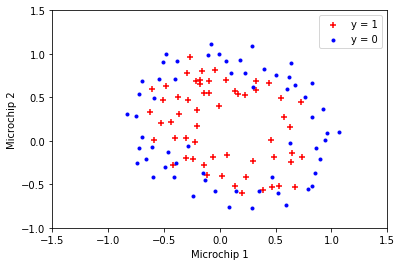

In [2]:
ex2data2 = np.loadtxt('ex2data2.txt', delimiter=',')

x = ex2data2[:, 0:2]
y = ex2data2[:, 2]

plot_class(x, y)
plt.xlabel("Microchip 1")
plt.ylabel("Microchip 2")
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 1.5)
plt.legend(["y = 1", "y = 0"])
plt.show()

In [3]:
x_poly = map_feature(x[:, 0], x[:, 1])
m, n = x_poly.shape
X = x_poly
theta = np.zeros((n + 1, 1))
reg_lambda = 0

In [4]:
cross_entropy_loss_reg(theta, X, y, reg_lambda)

In [5]:
cross_entropy_gradient_reg(theta, X, y, reg_lambda)

In [6]:
#options = {'eps':0.5e-5, 'maxiter':400}
#opt.minimize(fun=cross_entropy_loss_reg, x0=theta, method='TNC', args=(X, y, reg_lambda), options=options)

In [7]:
#acc = np.mean([sigmoid(np.dot(X, theta)) >= 0.5] == y.ravel())
#acc

In [8]:
#plot_decision_boundary(theta, X, y)